<a href="https://colab.research.google.com/github/utkarshg1/DL-2pm-4pm-Weekend/blob/main/Time_Series_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Decomposition
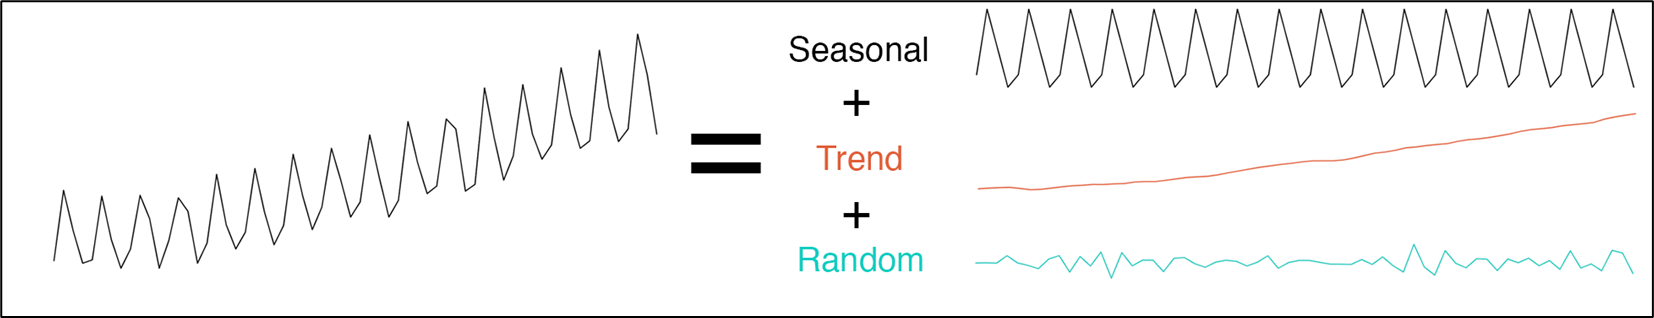

### Read the data

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/AirPassengers.csv"
df = pd.read_csv(url, parse_dates=True, index_col="Month")
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Visualizing above data

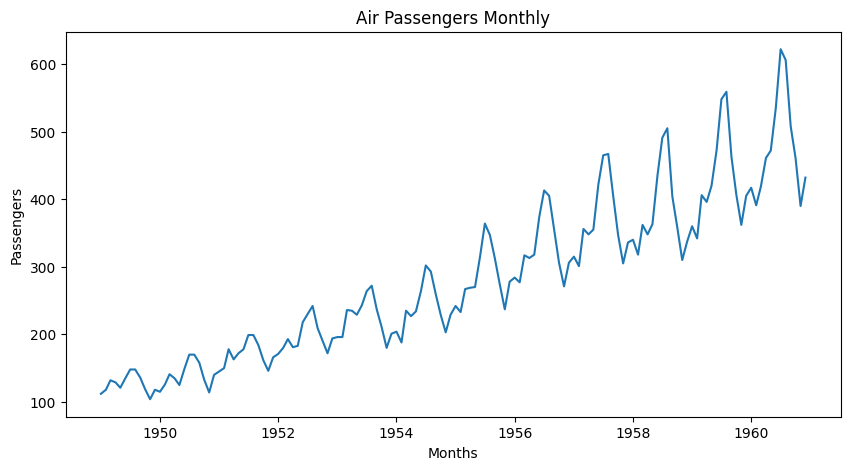

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df["Passengers"])
plt.xlabel("Months")
plt.ylabel("Passengers")
plt.title("Air Passengers Monthly")
plt.show()

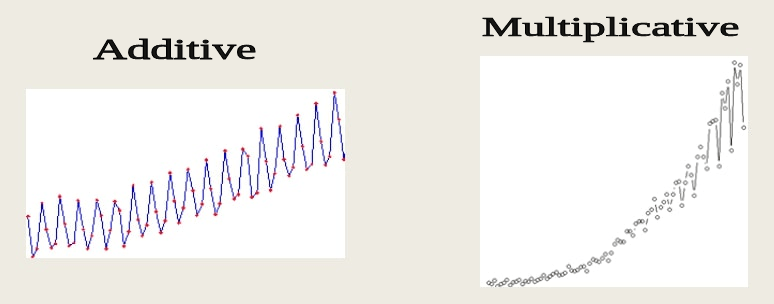

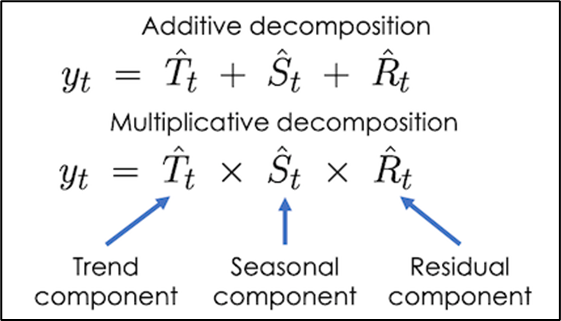

### Choose Multiplicative model from above

### Decompose the time series

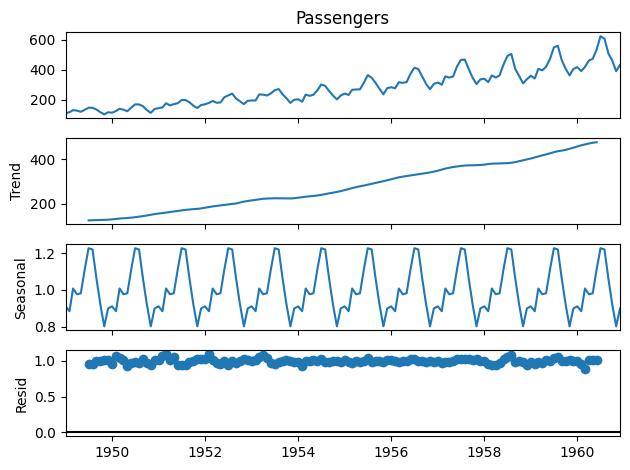

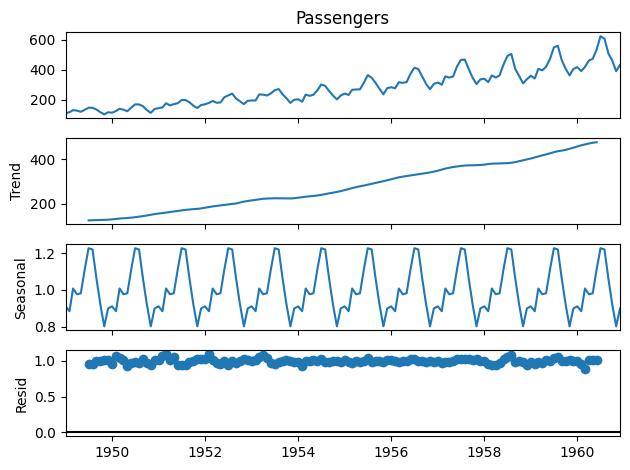

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
Q = seasonal_decompose(
    df["Passengers"],
    model="multiplicative",
    period=12
)
Q.plot()

In [14]:
Q.observed

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


In [15]:
Q.trend[10:]

,trend
Month,
1949-11-01,129.000000
1949-12-01,129.750000
1950-01-01,131.250000
1950-02-01,133.083333
1950-03-01,134.916667
...,...
1960-08-01,NaN
1960-09-01,NaN
1960-10-01,NaN


In [16]:
Q.seasonal

,seasonal
Month,
1949-01-01,0.910230
1949-02-01,0.883625
1949-03-01,1.007366
1949-04-01,0.975906
1949-05-01,0.981378
...,...
1960-08-01,1.219911
1960-09-01,1.060492
1960-10-01,0.921757


In [17]:
Q.resid[10:]

,resid
Month,
1949-11-01,1.006270
1949-12-01,1.011812
1950-01-01,0.962603
1950-02-01,1.071467
1950-03-01,1.037447
...,...
1960-08-01,NaN
1960-09-01,NaN
1960-10-01,NaN


### Trend

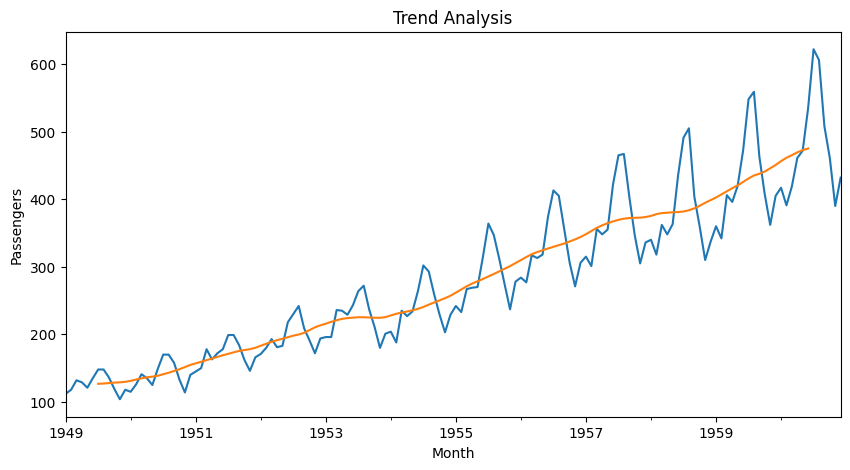

In [18]:
plt.figure(figsize=(10, 5))
Q.observed.plot()
Q.trend.plot()
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.title("Trend Analysis")
plt.show()

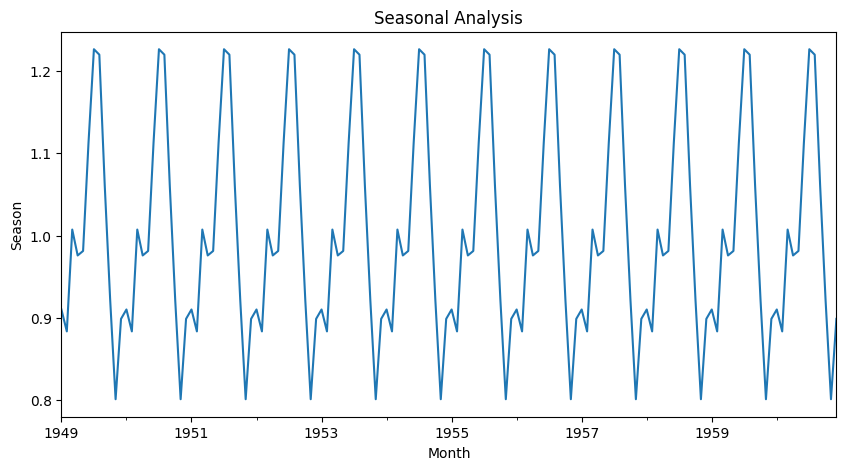

In [19]:
plt.figure(figsize=(10, 5))
Q.seasonal.plot()
plt.xlabel("Month")
plt.ylabel("Season")
plt.title("Seasonal Analysis")
plt.show()

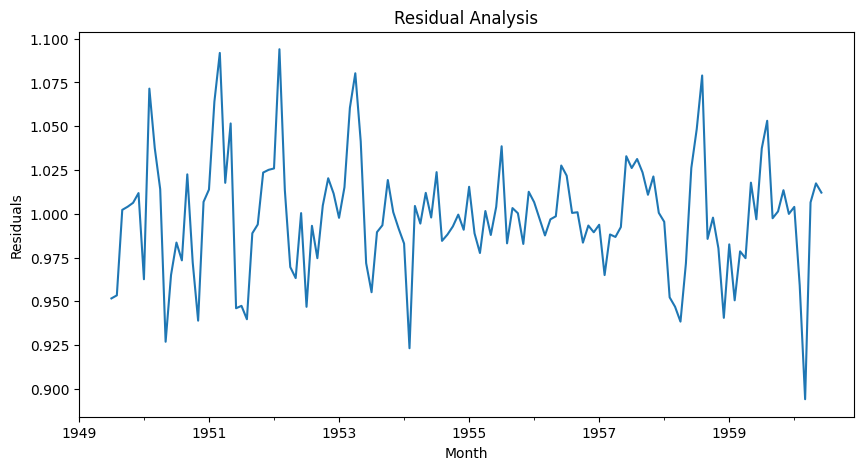

In [20]:
plt.figure(figsize=(10, 5))
Q.resid.plot()
plt.xlabel("Month")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()